In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df_acct = pd.read_csv('twm_accounts.csv', sep=';')
df_acct.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [24]:
# groupby cust_id, account type

df_acct_group = df_acct.groupby(['cust_id', 'acct_type'])['ending_balance'].count()

In [25]:
df_acct_group = df_acct_group.unstack(level=1)


In [30]:
df_acct_group = df_acct_group.fillna(0).reset_index()

In [31]:
df_acct_group.head()

acct_type,cust_id,CC,CK,SV
0,1362480,1.0,1.0,1.0
1,1362484,1.0,1.0,1.0
2,1362485,1.0,1.0,0.0
3,1362486,0.0,1.0,1.0
4,1362487,1.0,1.0,1.0


In [32]:
df_acct = pd.merge(df_acct, df_acct_group,on='cust_id')

In [33]:
df_acct.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,CC,CK,SV
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,1.0,1.0,1.0
1,13628062,1362806,CK,Y,22.11.1993,NaN,218.47,2561.24,1.0,1.0,1.0
2,4561143213628060,1362806,CC,Y,27.11.1994,NaN,214.46,1541.64,1.0,1.0,1.0
3,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,1.0,1.0,1.0
4,13627093,1362709,SV,Y,8.9.1995,NaN,134.28,917.33,1.0,1.0,1.0


In [179]:
# remove columns that are not helpful
df = df_cust.drop(columns=['first_name', 
                           'last_name', 
                           'street_nbr', 
                           'street_name', 
                           'name_prefix', 
                           'cust_id'])

In [180]:
df.head()

,income,age,years_with_bank,nbr_children,gender,marital_status,postal_code,city_name,state_code
0,26150,46,5,1,M,2,89194,Las Vegas,NV
1,6605,71,1,0,M,2,90159,Los Angeles,CA
2,18548,38,8,0,F,1,90024,Los Angeles,CA
3,47668,54,3,0,F,1,90172,Los Angeles,CA
4,44554,59,9,2,F,4,10138,New York City,NY


In [181]:
# transfer gender to binary (1 = male, 2 = female)

df = pd.concat([df, pd.get_dummies(df['gender'])], axis=1)

# don't use dummies, bring back states / postal codes with numerals

In [182]:
df.head()

,income,age,years_with_bank,nbr_children,gender,marital_status,postal_code,city_name,state_code,F,M
0,26150,46,5,1,M,2,89194,Las Vegas,NV,0,1
1,6605,71,1,0,M,2,90159,Los Angeles,CA,0,1
2,18548,38,8,0,F,1,90024,Los Angeles,CA,1,0
3,47668,54,3,0,F,1,90172,Los Angeles,CA,1,0
4,44554,59,9,2,F,4,10138,New York City,NY,1,0


In [183]:
df = df.drop(['gender', 'F '], axis=1)

In [186]:
df['City']= df['city_name'].str.rstrip()
df = df.drop('city_name', axis=1)

In [184]:
df.head()

,income,age,years_with_bank,nbr_children,marital_status,postal_code,city_name,state_code,M
0,26150,46,5,1,2,89194,Las Vegas,NV,1
1,6605,71,1,0,2,90159,Los Angeles,CA,1
2,18548,38,8,0,1,90024,Los Angeles,CA,0
3,47668,54,3,0,1,90172,Los Angeles,CA,0
4,44554,59,9,2,4,10138,New York City,NY,0


In [199]:
df_cities = pd.read_csv('cities.csv', sep=';')
df_cities = df_cities.drop(['Rank', 'State', 'Growth From 2000 to 2013', 'Population'], axis=1)
df_cities.head()

,City,Coordinates
0,Noblesville,"40.0455917,-86.0085955"
1,Southaven,"34.9889818,-90.0125913"
2,Chino,"34.0122346,-117.688944"
3,Gaithersburg,"39.1434406,-77.2013705"
4,Fountain Valley,"33.7091847,-117.9536697"


In [200]:
df_cities = df_cities.replace(to_replace="New York",value="New York City")
df_cities = df_cities.replace(to_replace="St. Louis",value="St Louis")
df_cities = df_cities.replace(to_replace="St. Paul",value="St Paul")
# df.replace(to_replace ="Boston Celtics", value ="Omega Warrior") 
df_cities

,City,Coordinates
0,Noblesville,"40.0455917,-86.0085955"
1,Southaven,"34.9889818,-90.0125913"
2,Chino,"34.0122346,-117.688944"
3,Gaithersburg,"39.1434406,-77.2013705"
4,Fountain Valley,"33.7091847,-117.9536697"
...,...,...
995,Santa Barbara,"34.4208305,-119.6981901"
996,Addison,"41.931696,-87.9889556"
997,Rio Rancho,"35.2327544,-106.6630437"
998,Normal,"40.5142026,-88.9906312"


In [294]:
df_city = pd.merge(df,df_cities, how='left', on='City')

# categorize and bin income / age, assign as 1-589

df_city.head(10)

KeyError: 'City'

In [205]:

df_city["Coordinates"] = df_city["Coordinates"].fillna('38.047989,-84.501640')
df_city.head()

,income,age,years_with_bank,nbr_children,marital_status,postal_code,state_code,M,City,Coordinates
0,26150,46,5,1,2,89194,NV,1,Las Vegas,"36.1699412,-115.1398296"
1,6605,71,1,0,2,90159,CA,1,Los Angeles,"34.0522342,-118.2436849"
2,18548,38,8,0,1,90024,CA,0,Los Angeles,"34.0522342,-118.2436849"
3,47668,54,3,0,1,90172,CA,0,Los Angeles,"34.0522342,-118.2436849"
4,44554,59,9,2,4,10138,NY,0,New York City,"40.7127837,-74.0059413"


In [214]:
df_city[['Lat','Long']] = df_city['Coordinates'].str.split(",",expand=True)
df_city = df_city.drop(['postal_code','state_code','City','Coordinates'], axis=1)

KeyError: 'Coordinates'

In [297]:
df = df_city

In [298]:
# create bins for income and age
income_bins = [-1,1, 25000, 50000, 75000, 100000, 125000, 150000, 175000]
income_labels = [1,2,3,4,5,6,7,8]
df['income_bin'] = pd.cut(df['income'], bins=income_bins, labels=income_labels)

In [299]:
# create bins for income and age
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = [1,2,3,4,5]
df['age_bin'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

In [300]:
df = df.drop(['income', 'age'], axis=1)

In [301]:
df_std = df.copy()
df_std.head()

,years_with_bank,nbr_children,marital_status,M,Lat,Long,income_bin,age_bin
0,5,1,2,1,36.1699412,-115.1398296,3,3
1,1,0,2,1,34.0522342,-118.2436849,2,4
2,8,0,1,0,34.0522342,-118.2436849,2,2
3,3,0,1,0,34.0522342,-118.2436849,3,3
4,9,2,4,0,40.7127837,-74.0059413,3,3


In [302]:
df_coord = df[['Lat','Long']]

from sklearn.preprocessing import StandardScaler

X_coord = StandardScaler().fit_transform(df_coord)

df_coord = pd.DataFrame(X_coord, columns = df_coord.columns) # put back in dataframe
df_coord = df_coord.rename({'Lat':'lat', 'Long':'long'}, axis=1)
df_std = pd.concat([df,df_coord], axis=1)


In [303]:
df_std = df_std.drop(['Lat', 'Long'],axis=1)

In [304]:
df_std = df_std.rename({'M ':'gender'}, axis=1)

In [307]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# PCA object will fit a PCA for us
pca = PCA(n_components=7)

# Learning the components and transforming X into Z
Z = pca.fit(df_std)

In [308]:
pca.explained_variance_ratio_

array([0.52966628, 0.14023418, 0.1095715 , 0.08751584, 0.04928771,
       0.03887719, 0.02712634])

In [335]:
# selecting only top two PCA components

pca = PCA(n_components=2).fit(df_std)
pca_2d = pca.transform(df_std)

In [329]:
PC1 = []
PC2 = []

for i in range(len(Z)):
        PC1.append(Z[i][0])
        PC2.append(Z[i][1])

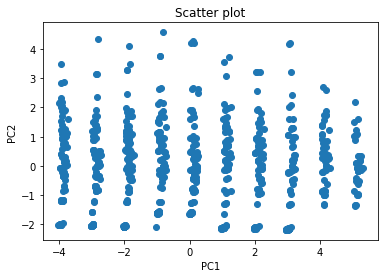

In [330]:
import matplotlib.pyplot as plt

plt.scatter(PC1, PC2)
plt.title('Scatter plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [312]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

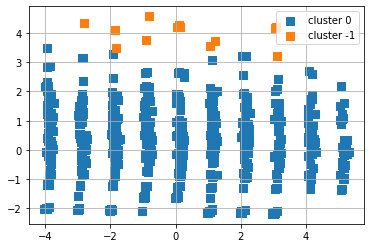

In [313]:
# try DBSCAN to see clusters

# import DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

eps= 1
min_samples=10

# create instance of DBSCAN class from sklearn library
db = DBSCAN(eps=eps,
            min_samples=min_samples,
            metric='euclidean')

# fit and predicr
y_db = db.fit_predict(Z)

# Plot DBSCAN clusters
plot_clusters(Z,y_db)

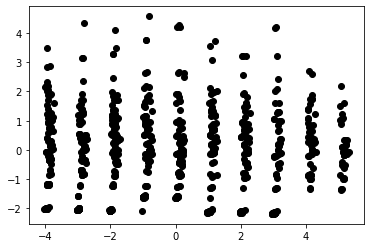

In [337]:
import pylab as pl
pl.scatter(pca_2d[:,0],pca_2d[:,1],c='black')
pl.show()

In [366]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=111)
kmeans.fit(pca_2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=111, tol=0.0001, verbose=0)

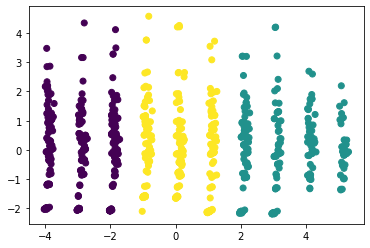

In [367]:
pl.figure('K-means with 3 clusters')
pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
pl.show()

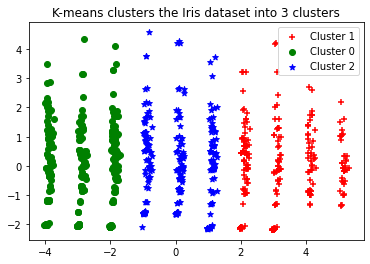

In [357]:
for i in range(0, pca_2d.shape[0]):
    if kmeans.labels_[i] == 1:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif kmeans.labels_[i] == 0:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
        
pl.legend([c1, c2, c3],['Cluster 1', 'Cluster 0','Cluster 2'])
pl.title('K-means clusters the customer dataset')
pl.show()

In [365]:
df_pca = pd.DataFrame(pca_2d)

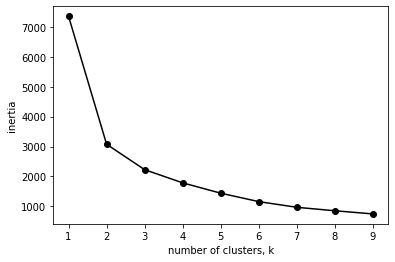

In [361]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(pca_2d)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [374]:
df_pca_kmeans = pd.concat([df_std,df_pca], axis=1)
df_pca_kmeans.columns.values[-2:]=['PC1', 'PC2']

In [377]:
df_pca_kmeans['segment_kmeans_pca'] = kmeans.labels_

In [381]:
df_pca_kmeans['segment']=df_pca_kmeans['segment_kmeans_pca'].map({0:'first',1:'second',2:'third'})

In [382]:
df_pca_kmeans.head()

,years_with_bank,nbr_children,marital_status,gender,income_bin,age_bin,lat,long,PC1,PC2,segment_kmeans_pca,segment
0,5,1,2,1,3,3,-0.240999,-1.003683,1.173056,0.707860,2,third
1,1,0,2,1,2,4,-0.671344,-1.167861,-2.758852,0.039326,0,first
2,8,0,1,0,2,2,-0.671344,-1.167861,4.116507,-1.325902,1,second
3,3,0,1,0,3,3,-0.671344,-1.167861,-0.793216,-0.391065,2,third
4,9,2,4,0,3,3,0.682163,1.172097,5.079828,2.191879,1,second


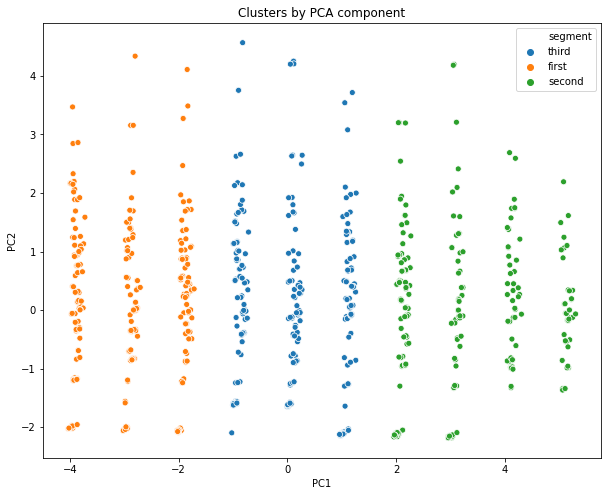

In [386]:
# Plot data by PCA components
x_axis = df_pca_kmeans['PC1']
y_axis = df_pca_kmeans['PC2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=df_pca_kmeans['segment'])
plt.title('Clusters by PCA component')
plt.show()